In [1]:
# importing modules needed

import os
import pandas as pd
import numpy as np
from scipy import stats
import openpyxl
import matplotlib.pyplot as plt
import scipy

In [2]:
##### define all functions here for pre processing ####

#kurt = lambda x : stats.kurtosis(x)

In [3]:
# folder path created for code and also the raw files
p1 = os.getcwd()
p2 = 'Final_Raw_Data'
path = os.path.join(p1,p2)

In [4]:
# here we set the type of conveyor only which we want to merge the data

Conveyor_type = 'MET'
Data_final = pd.DataFrame()


In [5]:
# here we set the type of conveyor only which we want to merge the data

Conveyor_type = 'MET'
Data_final = pd.DataFrame()


# below loop will load excel files one by one
# load it into a dataframe and filter it on conveyor type
# append the filtered data to a new dataframe Data_final

for i in os.listdir(path):
    if i[-24:] == '_TEST_LOOP_RAW_DATA.xlsx':
        #print(i)
        df = pd.read_excel(path+'\\'+i)
        df2 =df[df['Sensor_Loc'].str.contains(Conveyor_type)]
        #print(df2.shape)
        Data_final = Data_final.append(df2)
print('data import for conveyor type {} sucessful'.format(Conveyor_type))

data import for conveyor type MET sucessful


In [7]:
# checking the sample of data and also the no of rows we have using shape

Data_final.shape
Data_final.head()
type(Data_final)
Data_final.reset_index(inplace=True) # had to reset index as dataframe was appending from multiple files had index of its own.
# reset index after appending


In [11]:
Data_final.to_excel('Conveyor_Type_'+Conveyor_type+'_data.xlsx')

In [45]:
# create a copy of dataFrame

Data = Data_final.copy()
processed = Data.loc[:,'Data_pull_time':'Sensor_Loc']


### buiding graphs for wobling motor

In [57]:
wobling = Data[Data['Defect_Introduced'] == 'Wobling shaft present in the merge_No Load']

In [58]:
for i,row in wobling.iterrows():
    plot = row['Vsample1':'Vsample4096'].plot()
    #plot.set_xlim(0,4)
    fig = plot.get_figure()
    plt.suptitle(str(row['Data_pull_time'])+' '+row['Axis'])
    plt.title(row['Defect_Introduced']+' '+row['Sensor_Loc'])
    fig.savefig('./Wobling-Motor/'+row['Mac_Id'].replace(":","")+'_output'+str(i)+'.png')
    plt.close()

In [9]:
# for checking the added values

processed.head()

,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc
0,2020-07-13 15:40:14,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST
1,2020-07-13 16:11:10,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST
2,2020-07-14 09:20:54,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF
3,2020-07-14 10:14:32,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF
4,2020-07-14 10:33:04,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF


In [113]:
processed[processed.P2P > 14.0]

,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Max,Min,Mean,Std,P2P,Kurt,RMS,Var
228,2020-07-19 16:40:17,4c:92:10:8c,X,Belt showing signs of wear and tear,101.CA.DTL.01.1-210,MET-EDT,7.109375,-7.015625,0.033859,0.304636,14.125000,191.020657,19.614398,0.092803
354,2020-07-13 15:37:31,84:e1:93:bd,X,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.281250,-8.015625,0.229065,0.401707,16.296875,142.405036,29.592628,0.161368
489,2020-07-19 16:43:15,84:e1:93:bd,Y,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.125000,-7.750000,0.051819,0.375243,15.875000,109.861083,24.240535,0.140807
493,2020-07-13 15:38:59,84:e1:93:bd,Z,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,9.046875,-8.093750,0.918781,0.430832,17.140625,207.263463,64.944378,0.185616
558,2020-07-19 16:43:45,84:e1:93:bd,Z,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.296875,-8.593750,-0.585484,0.683848,16.890625,31.856596,57.611570,0.467649


### calculate max,   min,   average,   std for each row

In [10]:
processed['Max'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1)
processed['Min'] = Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
processed['Mean'] = Data.loc[:,'Vsample1':'Vsample4096'].mean(axis=1)
processed['Std'] = Data.loc[:,'Vsample1':'Vsample4096'].std(axis=1)

### Peak to Peak

In [11]:
processed['P2P'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1) - Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)

### kurtosis

In [12]:
processed['Kurt'] = Data.loc[:,'Vsample1':'Vsample4096'].kurt(axis=1)

### RMS

In [13]:
processed['RMS'] =  (Data.loc[:,'Vsample1':'Vsample4096']**2).sum(1).pow(1/2)

### Variance

In [14]:
processed['Var'] = Data.loc[:,'Vsample1':'Vsample4096'].var(axis=1)

### Remove G as per vishal   RMS < 0.2 and Kurt < 300 and freq side

# analyse by graphs

In [ ]:
Data_final.iloc[:20,:]

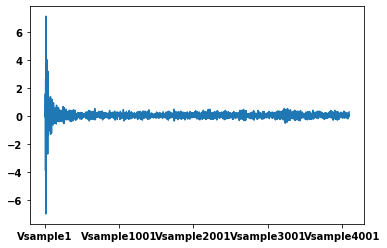

In [116]:
#for i in range(10):
row = Data_final.iloc[228]['Vsample1':'Vsample4096']
row.plot()

In [42]:
row = processed['P2P']

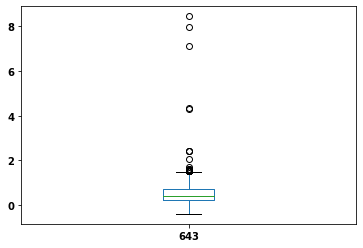

In [48]:
row.plot.box()

In [ ]:
processed.groupby('Defect_Introduced').max()

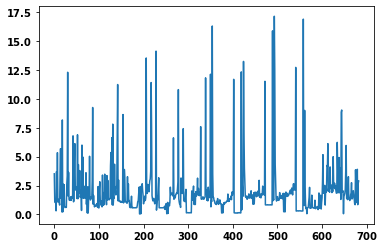

In [55]:
processed['P2P'].plot()

In [56]:
processed.shape

(683, 14)

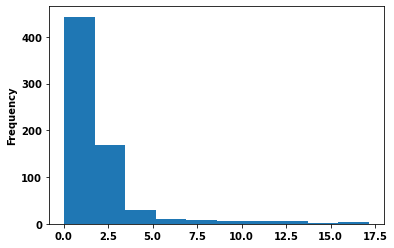

In [49]:
processed['P2P'].plot.hist()

### Frequency Distribution

In [31]:
Sec = 1.279374957 # sampling duration
N = 4096   # samples

Fs_rate = round(N/Sec)
Fs_rate    # in 1 second we sampled 3200 samples 

3202

In [37]:
Secs  = Sec/N
Secs # at what time interval we sampled the data 


Ts = 1/Fs_rate
Ts

0.0003123048094940662

In [ ]:
processed.iloc[493][]

### export plots of rows in dataframe

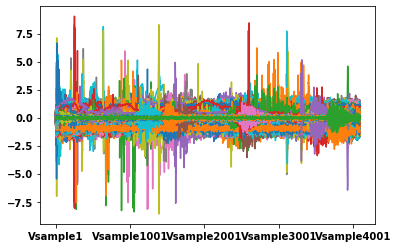

In [54]:
for i, row in Data_final.iterrows():
    row['Vsample1':'Vsample4096'].plot()

# frequency graph above where a max frequency is above 8

In [59]:
Data_final.head()

,index,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Vsample1,Vsample2,Vsample3,...,Vsample4087,Vsample4088,Vsample4089,Vsample4090,Vsample4091,Vsample4092,Vsample4093,Vsample4094,Vsample4095,Vsample4096
0,0,2020-07-13 15:40:14,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST,0.171875,0.640625,1.093750,...,-0.125000,-0.140625,-0.078125,-0.015625,0.000000,-0.015625,0.000000,0.015625,0.015625,-0.046875
1,1,2020-07-13 16:11:10,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST,0.171875,0.015625,0.000000,...,-0.203125,0.000000,-0.234375,-0.078125,-0.234375,-0.109375,-0.093750,-0.078125,0.109375,0.093750
2,2,2020-07-14 09:20:54,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.171875,0.015625,0.031250,...,-0.140625,-0.031250,0.015625,0.031250,0.156250,0.250000,0.156250,0.109375,0.125000,0.125000
3,3,2020-07-14 10:14:32,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.171875,0.015625,0.000000,...,0.218750,0.015625,0.125000,0.218750,0.125000,0.031250,0.046875,-0.015625,-0.171875,-0.218750
4,4,2020-07-14 10:33:04,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.171875,-0.046875,0.015625,...,0.015625,0.000000,-0.015625,0.000000,-0.015625,0.000000,0.015625,0.031250,0.046875,0.046875


In [77]:
for i, row in Data_final.iterrows():
    #print(row['Vsample1':'Vsample4096'].max())
    if row['Vsample1':'Vsample4096'].max() >= 8:
        plot = row['Vsample1':'Vsample4096'].plot.hist()
        #plot.set_xlim(0,4)
        fig = plot.get_figure()
        plt.suptitle(str(row['Data_pull_time'])+' '+row['Axis'])
        plt.title(row['Defect_Introduced']+' '+row['Sensor_Loc'])
        fig.savefig('./Histo/'+row['Mac_Id'].replace(":","")+'_output'+str(i)+'.png')
    
        plt.close()

In [ ]:
row['Data_pull_time'] <= pd.to_datetime('2020-07-14 00:00:00')

## Oulier removal from P2P using box plot outlier detection
### Metering data grouped on sensor location, fault 

In [82]:
Data_final.shape
processed.head()

,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Max,Min,Mean,Std,P2P,Kurt,RMS,Var
0,2020-07-13 15:40:14,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST,1.968750,-1.546875,0.005970,0.214495,3.515625,15.857203,13.731299,0.046008
1,2020-07-13 16:11:10,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST,0.640625,-0.562500,0.005566,0.084800,1.203125,3.319736,5.438241,0.007191
2,2020-07-14 09:20:54,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.500000,-0.531250,0.006184,0.098063,1.031250,0.764959,6.287757,0.009616
3,2020-07-14 10:14:32,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.781250,-0.531250,0.005722,0.111216,1.312500,1.537715,7.126370,0.012369
4,2020-07-14 10:33:04,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.171875,-0.140625,0.006302,0.038998,0.312500,0.788191,2.527969,0.001521


In [91]:
P2P_List = processed.groupby(['Defect_Introduced','Sensor_Loc']).P2P.apply(list).reset_index(name='P2P')

In [152]:
P2P_List
type(P2P_List)

pandas.core.frame.DataFrame

In [101]:
x = P2P_List[P2P_List['Defect_Introduced'] == 'Belt showing signs of wear and tear'].P2P

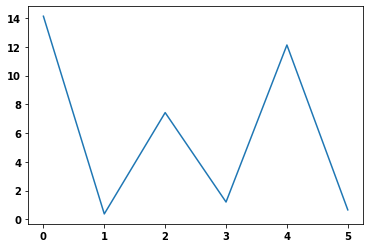

In [111]:
pd.Series(x[0]).plot()

### FFT

In [38]:
row = Data_final.iloc[228]['Vsample1':'Vsample4096']
row.to_csv('ttesting.csv')
    

-0.78173828125


3202.0

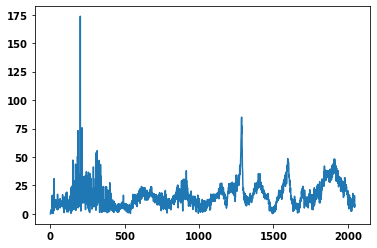

In [44]:
row = Data_final.iloc[228]['Vsample1':'Vsample4096']
N=4096
sec = 1.279374957
fs_rate=round(N/sec) ## alternatively that means frequency

   
secs = N / float(fs_rate) ## time for which it will be played in sec

Ts = 1.0/fs_rate # sampling interval in time

t = np.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

freqs = scipy.fft.fftfreq(N, t[1]-t[0])
print(freqs[4095])
freqs_side = freqs[range(N//2)] # one side frequency range
               
                ## caliberate the sensor in case there is gravitational effect left from the sensor settings
data = Data_final.iloc[228]['Vsample1':'Vsample4096']
meanVal=np.mean(data)
data-=meanVal
   
FFT = scipy.fft.fft(data)
FFT_side = FFT[range(N//2)] # one side FFT range, because we need just the haf of the frequency data because of symmetry
abs_fft_1=2*abs(FFT_side)/N


type(abs_fft_1)
plt.plot(abs(FFT[range(N//2)]))

1/t[1]

In [35]:
print(1/sec + 1/sec)
freqs[:10]

1.5632633647056764


array([0.        , 0.78173828, 1.56347656, 2.34521484, 3.12695312,
       3.90869141, 4.69042969, 5.47216797, 6.25390625, 7.03564453])

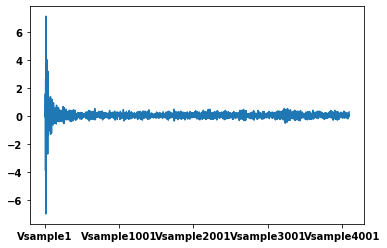

In [29]:
row.plot()

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


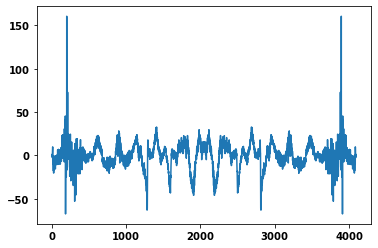

In [147]:
plt.plot(FFT)

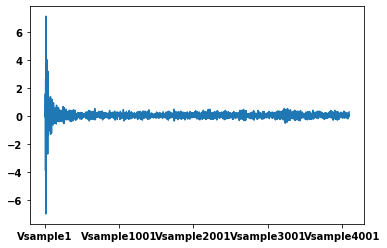

In [125]:
row.plot()

In [94]:
processed.groupby(['Defect_Introduced','Sensor_Loc']).P2P.count()

Defect_Introduced                    Sensor_Loc
Belt showing signs of wear and tear  MET-EDT         6
No Defect_No Load                    MET-CFL        33
                                     MET-CFR        10
                                     MET-DSF        33
                                     MET-DUL         9
                                     MET-DUR        18
                                     MET-EDT       346
                                     MET-TST        18
                                     MET-TUL        69
                                     MET-TUR        66
Slight Wobling in the motor          MET-DSF        39
                                     MET-DUL         9
                                     MET-DUR        27
Name: P2P, dtype: int64

### create box plot processed data for each row

In [165]:
for i,row in P2P_List.iterrows():
    plot = pd.Series(row['P2P']).plot.box()
    fig = plot.get_figure()
    plt.suptitle(str(row['Defect_Introduced']))
    plt.title(row['Sensor_Loc'])
    fig.savefig('./Outlier/'+str(i)+'.png')
    plt.close()

In [ ]:
for i,row in Data[(Data.Defect_Introduced == "No Defect_Empty Tray")  & (Data.Asset_Id == "101.CA.DTL.01.1-030") & (Data.Axis == 'X')].iterrows():
    #if (row['Vsample1':'Vsample4096'].max() > 2) and (row['Vsample1':'Vsample4096'].min() < 0) :
    plot = row['Vsample1':'Vsample4096'].plot()
    plot.set_ylim(-4,4)
    fig = plot.get_figure()
    plt.suptitle(str(row['Data_pull_time'])+' '+row['Axis'])
    plt.title(row['Defect_Introduced']+' '+row['Sensor_Loc'])
    fig.savefig('./101.CA.DTL.01.1-030/Load/X/'+row['Mac_Id'].replace(":","")+'_'+row['Axis']+'_'+str(i)+'.png')
    plt.close()